In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from dataset import *

import matplotlib.ticker as ticker

In [2]:
activations_save = {
    "relu": "ReLU",
    "elu": "ELU",
    "gelu": "GELU",
    "leaky-relu": "Leaky ReLU",
    "quadratic": "Quadratic",
}

# Accuracy vs. width for different activation functions

In [13]:
dim = 16
#widths = [32, 64, 128, 256, 512, 1024]
widths = [8, 16, 32, 64, 128, 256]
activations = ["relu", "elu", "gelu", "leaky-relu", "quadratic"]
K = 2
angle = 0
rank = 4
num_trials = 10

In [15]:
# Load in saved results
train_accs = np.zeros((num_trials, len(widths), len(activations)))
test_accs = np.zeros((num_trials, len(widths), len(activations)))


for k in range(num_trials):
    trial_dir = "trial_" + str(k)
    for (i, width) in enumerate(widths):
        for (j, activation) in enumerate(activations):
            results_dir = "save/hybrid/activations/width_" + str(width) + "_depth_2_nonlinear_depth_1_" + str(K) + "_classes_rank_" + str(rank) + "_angle_" + str(angle) + "_" + activation + "_activation_seed_0"
            train_best_result = torch.load(os.path.join(results_dir, trial_dir, "best.pth"), map_location=torch.device('cpu'))
            test_result = torch.load(os.path.join(results_dir, trial_dir, "test.pth"), map_location=torch.device('cpu'))

            cur_train_accs = train_best_result['train_accuracies']
            train_accs[k, i, j] = np.max(cur_train_accs)

            test_accs[k, i, j] = np.max(test_result['test_accuracy'])

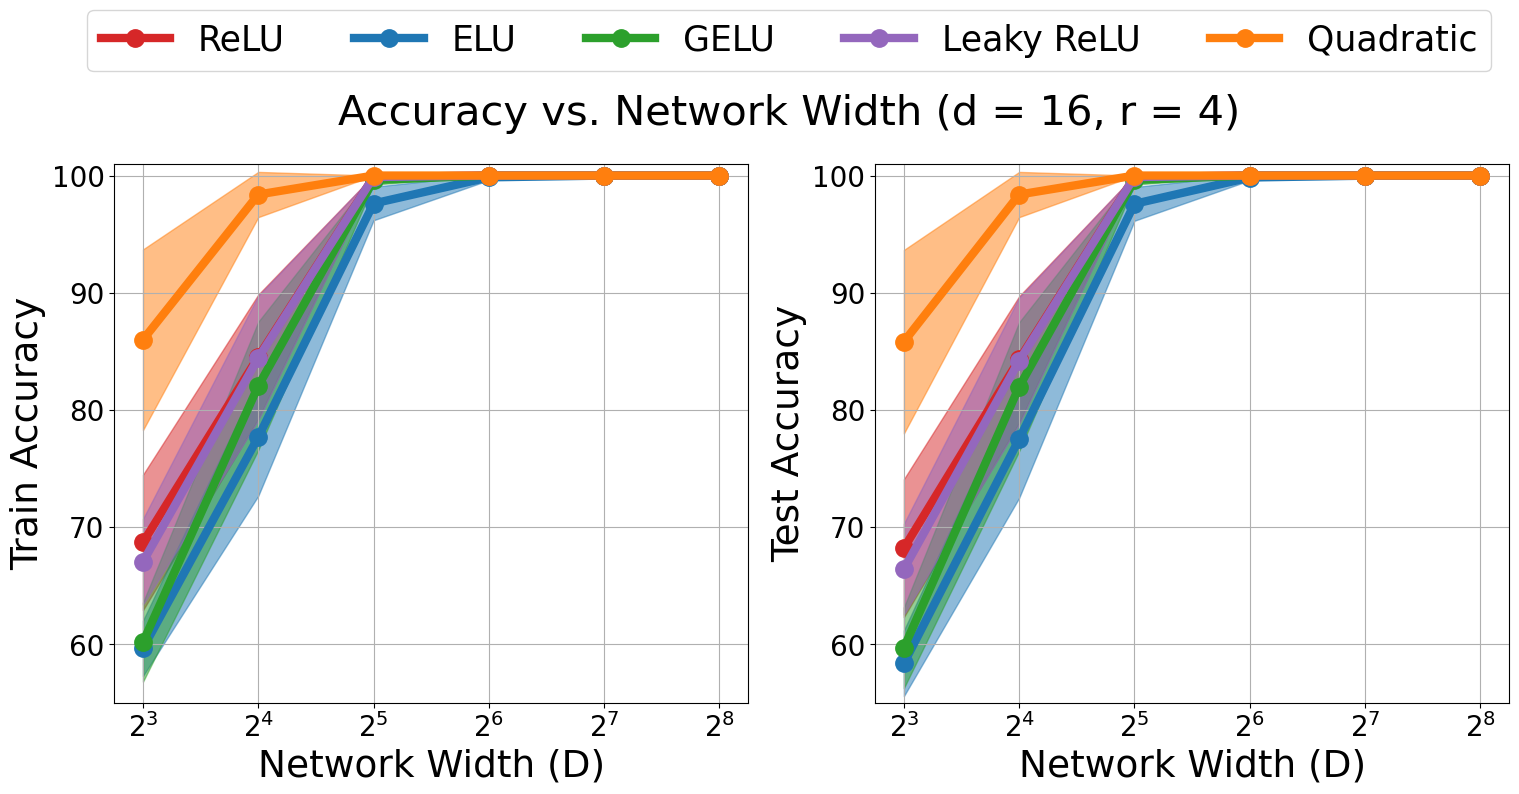

In [18]:
# Plot results
train_accs_mean = np.mean(train_accs, axis=0)
train_accs_std = np.std(train_accs, axis=0)

test_accs_mean = np.mean(test_accs, axis=0)
test_accs_std = np.std(test_accs, axis=0)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 7))

dim_base = int(np.log2(dim))
dim_save = str(dim)

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange'] 

# Plot training
ax1.set_xlabel(r'Network Width (D)', fontsize=27)
ax1.set_ylabel('Train Accuracy', fontsize=27)
#ax1.set_title('Accuracy vs. Network Width (d = ' + str(dim) + ', r = ' + str(rank) + ')', fontsize=22)

lns = []
for i in range(len(activations)):
    l_i = ax1.plot(widths, list(train_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=activations_save[activations[i]])
    ax1.fill_between(widths, list(train_accs_mean[:, i] - train_accs_std[:, i]), list(train_accs_mean[:, i] + train_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax1.grid()
ax1.set_ylim(55, 101)

# Plot testing
ax2.set_xlabel(r'Network Width (D)', fontsize=27)
ax2.set_ylabel('Test Accuracy', fontsize=27)
#ax2.set_title('Accuracy vs. Network Width (d = ' + str(dim) + ', r = ' + str(rank) + ')', fontsize=22)

lns = []
for i in range(len(activations)):
    l_i = ax2.plot(widths, list(test_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=activations_save[activations[i]])
    ax2.fill_between(widths, list(test_accs_mean[:, i] - test_accs_std[:, i]), list(test_accs_mean[:, i] + test_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    
    lns += l_i

ax2.set_xscale('log', base=2)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)

labs = [l.get_label() for l in lns]
#ax2.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax2.grid()
ax2.set_ylim(55, 101)

fig.suptitle('Accuracy vs. Network Width (d = ' + str(dim) + ', r = ' + str(rank) + ')', fontsize=30)
fig.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.125), ncol=len(activations), fontsize=25)
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Accuracy vs. width for different number of classes 

In [11]:
dim = 16
#widths = [32, 64, 128, 256, 512, 1024]
widths = [8, 16, 32, 64, 128, 256]
activation = "quadratic"
K = [2, 3, 4, 5]
angle = 0
rank = 4
num_trials = 10

In [12]:
# Load in saved results
train_accs = np.zeros((num_trials, len(widths), len(K)))
test_accs = np.zeros((num_trials, len(widths), len(K)))


for i in range(num_trials):
    trial_dir = "trial_" + str(i)
    for (j, width) in enumerate(widths):
        for (k, cla) in enumerate(K):
            results_dir = "save/hybrid/activations/width_" + str(width) + "_depth_2_nonlinear_depth_1_" + str(cla) + "_classes_rank_" + str(rank) + "_angle_" + str(angle) + "_" + activation + "_activation_seed_0"
            train_best_result = torch.load(os.path.join(results_dir, trial_dir, "best.pth"), map_location=torch.device('cpu'))
            test_result = torch.load(os.path.join(results_dir, trial_dir, "test.pth"), map_location=torch.device('cpu'))

            cur_train_accs = train_best_result['train_accuracies']
            train_accs[i, j, k] = np.max(cur_train_accs)

            test_accs[i, j, k] = np.max(test_result['test_accuracy'])

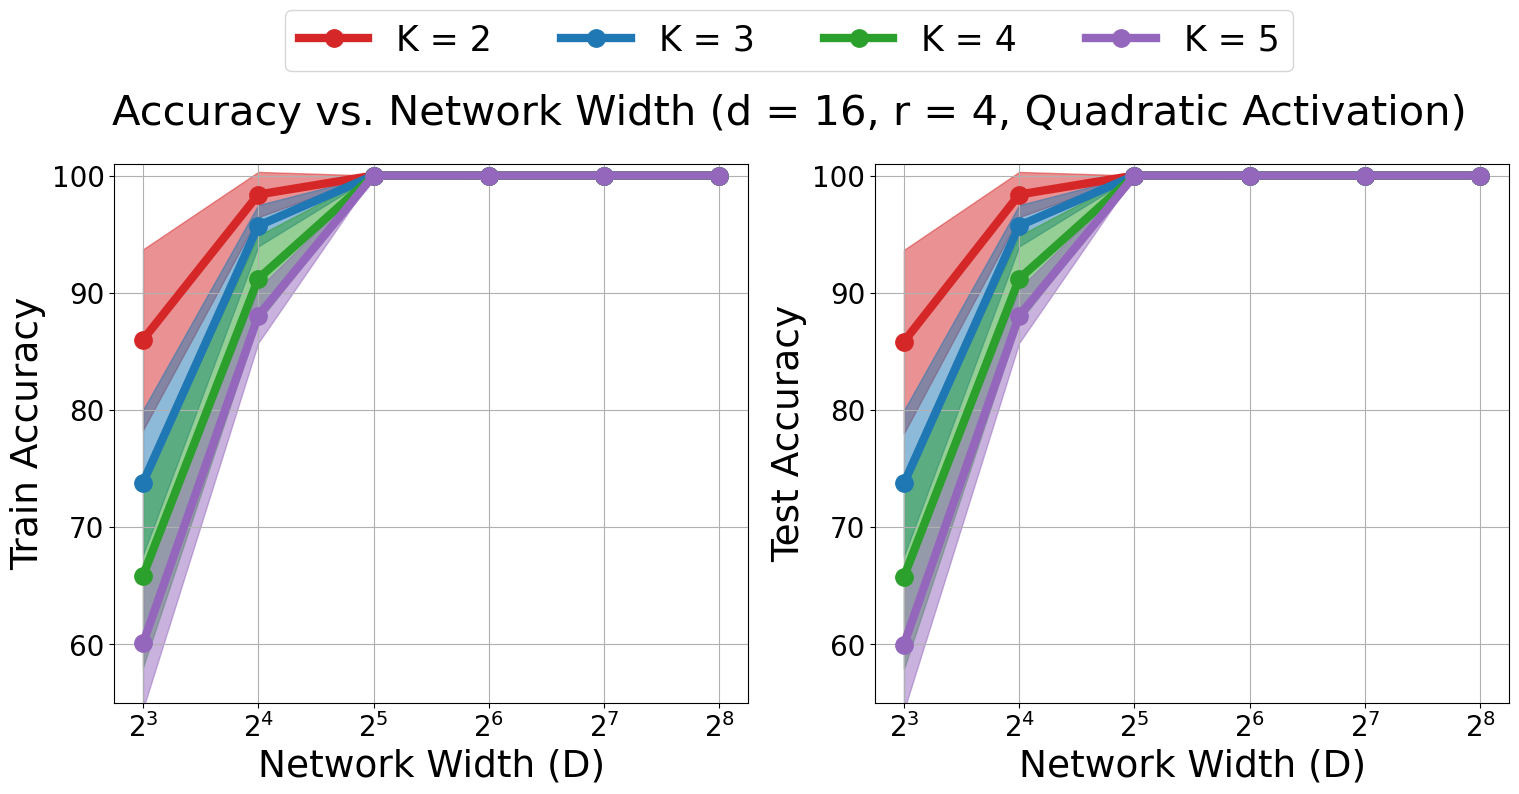

In [14]:
# Plot results
train_accs_mean = np.mean(train_accs, axis=0)
train_accs_std = np.std(train_accs, axis=0)

test_accs_mean = np.mean(test_accs, axis=0)
test_accs_std = np.std(test_accs, axis=0)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 7))

dim_base = int(np.log2(dim))
dim_save = str(dim)

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange'] 

# Plot training
ax1.set_xlabel(r'Network Width (D)', fontsize=27)
ax1.set_ylabel('Train Accuracy', fontsize=27)
#ax1.set_title('Accuracy vs. Network Width (d = ' + str(dim) + ', r = ' + str(rank) + ')', fontsize=22)

lns = []
for i in range(len(K)):
    l_i = ax1.plot(widths, list(train_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label="K = " + str(K[i]))
    ax1.fill_between(widths, list(train_accs_mean[:, i] - train_accs_std[:, i]), list(train_accs_mean[:, i] + train_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax1.grid()
ax1.set_ylim(55, 101)

# Plot testing
ax2.set_xlabel(r'Network Width (D)', fontsize=27)
ax2.set_ylabel('Test Accuracy', fontsize=27)
#ax2.set_title('Accuracy vs. Network Width (d = ' + str(dim) + ', r = ' + str(rank) + ')', fontsize=22)

lns = []
for i in range(len(K)):
    l_i = ax2.plot(widths, list(test_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label="K = " + str(K[i]))
    ax2.fill_between(widths, list(test_accs_mean[:, i] - test_accs_std[:, i]), list(test_accs_mean[:, i] + test_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    
    lns += l_i

ax2.set_xscale('log', base=2)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)

labs = [l.get_label() for l in lns]
#ax2.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax2.grid()
ax2.set_ylim(55, 101)

fig.suptitle('Accuracy vs. Network Width (d = ' + str(dim) + ', r = ' + str(rank) + ', ' + activations_save[activation] + ' Activation)', fontsize=30)
fig.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.125), ncol=len(K), fontsize=25)
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()